In [27]:
#Question 1 
import pandas as pd 
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep='|')
#mean age per occupation
mean = users.groupby('occupation')['age'].mean().reset_index()
user= pd.DataFrame({"occupation" : mean['occupation'],"Average" : mean["age"]})
user

,occupation,Average
0,administrator,38.746835
1,artist,31.392857
2,doctor,43.571429
3,educator,42.010526
4,engineer,36.388060
5,entertainment,29.222222
6,executive,38.718750
7,healthcare,41.562500
8,homemaker,32.571429
9,lawyer,36.750000


In [78]:
#Discover the Male ratio per occupation and sort it from the most to the least
male_ratio = users[users['gender'] == 'M'].groupby('occupation')['gender'].count() / users.groupby('occupation')['gender'].count()
#sorting the male ratio 
sortedratio = male_ratio.sort_values(ascending=False)
# Creating a DataFrame with 'occupation' and 'male_ratio'
male_ratio_table = pd.DataFrame({'occupation': sortedratio.index, 'male ratio': sortedratio.values})
male_ratio_table

,occupation,male ratio
0,doctor,1.000000
1,engineer,0.970149
2,technician,0.962963
3,retired,0.928571
4,programmer,0.909091
5,executive,0.906250
6,scientist,0.903226
7,entertainment,0.888889
8,lawyer,0.833333
9,salesman,0.750000


In [106]:
#For each occupation, calculate the minimum and maximum ages
min_max = users.groupby('occupation')['age'].agg([('min_age', 'min'), ('max_age', 'max')])
table = pd.DataFrame({'occupation': min_max.index, 'Minimum Age': min_max['min_age'], 'Maximum Age': min_max['max_age']})
table = table.reset_index(drop=True)
table


,occupation,Minimum Age,Maximum Age
0,administrator,21,70
1,artist,19,48
2,doctor,28,64
3,educator,23,63
4,engineer,22,70
5,entertainment,15,50
6,executive,22,69
7,healthcare,22,62
8,homemaker,20,50
9,lawyer,21,53


In [107]:
# For each combination of occupation and sex, calculate the mean age 
Mean_Age = pd.pivot_table(users,'age','occupation','gender').round(4)
Mean_Age.unstack()

gender  occupation   
F       administrator    40.6389
        artist           30.3077
        doctor               NaN
        educator         39.1154
        engineer         29.5000
        entertainment    31.0000
        executive        44.0000
        healthcare       39.8182
        homemaker        34.1667
        lawyer           39.5000
        librarian        40.0000
        marketing        37.2000
        none             36.5000
        other            35.4722
        programmer       32.1667
        retired          70.0000
        salesman         27.0000
        scientist        28.3333
        student          20.7500
        technician       38.0000
        writer           37.6316
M       administrator    37.1628
        artist           32.3333
        doctor           43.5714
        educator         43.1014
        engineer         36.6000
        entertainment    29.0000
        executive        38.1724
        healthcare       45.4000
        homemaker    

In [115]:
#For each occupation present the percentage of women and men
Male_percentage = (users[users['gender'] == 'M'].groupby('occupation')['gender'].count() / users.groupby('occupation')['gender'].count())*100
Female_percentage = (users[users['gender'] == 'F'].groupby('occupation')['gender'].count() / users.groupby('occupation')['gender'].count())*100
Male_percentage = pd.DataFrame({'occupation': Male_percentage.index, 'Male Percentage': Male_percentage.values})
Female_percentage = pd.DataFrame({'occupation': Female_percentage.index, 'Female Percentage': Female_percentage.values})
table = pd.merge(Male_percentage, Female_percentage, on='occupation')
table

,occupation,Male Percentage,Female Percentage
0,administrator,54.430380,45.569620
1,artist,53.571429,46.428571
2,doctor,100.000000,NaN
3,educator,72.631579,27.368421
4,engineer,97.014925,2.985075
5,entertainment,88.888889,11.111111
6,executive,90.625000,9.375000
7,healthcare,31.250000,68.750000
8,homemaker,14.285714,85.714286
9,lawyer,83.333333,16.666667


In [123]:
#Question 2
import pandas as pd 
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
# Select only the Goal column
Goals = pd.DataFrame({'Goals':euro12['Goals']})
Goals

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [156]:
#. How many team participated in the Euro2012?
#euro12
team_number = euro12['Team'].nunique()
print(f"{team_number} teams particated in  Euro 2012\n")
# What is the number of columns in the dataset?
column_number = len(euro12.columns)
print(f"There are {column_number} columns in  Euro 2012")
#View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = pd.DataFrame({"Team":euro12['Team'],'Yellow Cards':euro12['Yellow Cards'],'Red Cards':euro12['Red Cards']})
# Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(by= ['Red Cards','Yellow Cards']).reset_index(drop='True')



16 teams particated in  Euro 2012

There are 35 columns in  Euro 2012


,Team,Yellow Cards,Red Cards
0,Denmark,4,0
1,Germany,4,0
2,England,5,0
3,Netherlands,5,0
4,Ukraine,5,0
5,France,6,0
6,Russia,6,0
7,Czech Republic,7,0
8,Sweden,7,0
9,Croatia,9,0


In [163]:
#Calculate the mean Yellow Cards given per Team
Mean = discipline.groupby('Team')['Yellow Cards'].mean()
Mean = pd.DataFrame({'Team':Mean.index,'Average':Mean.values})
Mean

,Team,Average
0,Croatia,9.0
1,Czech Republic,7.0
2,Denmark,4.0
3,England,5.0
4,France,6.0
5,Germany,4.0
6,Greece,9.0
7,Italy,16.0
8,Netherlands,5.0
9,Poland,7.0


In [184]:
#Filter teams that scored more than 6 goals.Select the teams that start with G
filtered1 = euro12.loc[(euro12['Goals'] > 6) &(euro12['Team'].str.startswith('G'))]
filtered1

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17


In [185]:
# Select the first 7 columns
filtered2 = euro12.iloc[:,:7]
filtered2

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [187]:
#Select all columns except the last 3
filtered3 = euro12.iloc[:,:-3]
filtered3

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [202]:
 #Present only the Shooting Accuracy from England, Italy and Russia
selected_team = ['England', 'Italy', 'Russia']

filtered = euro12[euro12['Team'].isin(selected_team)][['Team', 'Shooting Accuracy']]
filtered.reset_index(drop='True')

,Team,Shooting Accuracy
0,England,50.0%
1,Italy,43.0%
2,Russia,22.5%


In [217]:
#Question 3 
import pandas as pd 
import numpy as np 
series1 = pd.Series(np.random.uniform(1, 4, 100))
series2 = pd.Series(np.random.uniform(1,3,100))
series3 = pd.Series(np.random.uniform(10000, 30000, 100))
#creating a data frame for them with column name bedrs, bathrs, price_sqr_meter respectively
Table = pd.DataFrame({"bedrs":series1,"bathrs":series2,"price_sqr_meter":series3})
Table

,bedrs,bathrs,price_sqr_meter
0,1.691726,1.791361,14446.698372
1,2.324222,1.560126,27239.124587
2,1.625530,2.027880,16850.250229
3,1.959676,2.757412,14828.110455
4,2.655770,2.112686,29121.222921
...,...,...,...
95,1.893522,2.004682,16473.625487
96,2.702458,2.405155,25301.951819
97,1.914825,2.560695,15071.942789
98,3.677488,2.789964,15544.940189


In [228]:
#creating one column
Table2 = pd.DataFrame({"bigcolumn": pd.concat([series1, series2, series3]).reset_index(drop='True')})
Table2

,bigcolumn
0,1.691726
1,2.324222
2,1.625530
3,1.959676
4,2.655770
...,...
295,16473.625487
296,25301.951819
297,15071.942789
298,15544.940189


In [1]:
#Question4 
import pandas as pd 
data = pd.read_csv('C://Users//USER//Downloads//wind.txt', sep='\s+')
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [2]:
# Create the 'Year' Column
data['Year'] = data['Yr'].apply(lambda x: x + 1900 if x >= 61 else x + 2000)

# Create the 'Date' Column
data['Date'] = pd.to_datetime(data[['Year', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), errors='coerce')

# Set 'Date' as the Index
data = data.set_index('Date')

# Drop the original 'Yr', 'Mo', 'Dy' columns
data = data.drop(['Yr', 'Mo', 'Dy','Year'], axis=1)
data


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [3]:
#Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
missing_values = data.isnull().sum()
Frame = pd.DataFrame({'Location': missing_values.index,'Number of missing Values':missing_values.values})
Frame


,Location,Number of missing Values
0,RPT,6
1,VAL,3
2,ROS,2
3,KIL,5
4,SHA,2
5,BIR,0
6,DUB,3
7,CLA,2
8,MUL,3
9,CLO,1


In [4]:
# Compute how many non-missing values there are in total.
non_missing_values = data.count().sum()
print(f"There are {non_missing_values} data that are not missing in the dataset")

There are 78857 data that are not missing in the dataset


In [5]:
#Calculate the mean windspeeds of the windspeeds over all the locations and all the times. 
Mean = data.mean().mean()  #will ignore the missing values 
print(f"The mean of the dataset is {Mean}")

The mean of the dataset is 10.227982360836938


In [6]:
# Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the 
#day
loc_stats = data.agg(['min','max','mean','std'],skipna=True)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [16]:
minV = data.min(axis=1)
maxV = data.max(axis=1)
meanV= data.mean(axis=1)
stdV = data.std(axis=1)
day_stats = pd.DataFrame({'Date': minV.index,'Minimum Windspeed': minV.values,'Maxmum Windspeed':maxV,'Average Windspeed':meanV,'Standard Deviation':stdV}).reset_index(drop=True)
day_stats

,Date,Minimum Windspeed,Maxmum Windspeed,Average Windspeed,Standard Deviation
0,1961-01-01,9.29,18.50,13.018182,2.808875
1,1961-01-02,6.50,17.54,11.336364,3.188994
2,1961-01-03,6.17,18.50,11.641818,3.681912
3,1961-01-04,1.79,11.75,6.619167,3.198126
4,1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...,...
6569,1978-12-27,8.08,40.08,16.708333,7.868076
6570,1978-12-28,5.00,41.46,15.150000,9.687857
6571,1978-12-29,8.71,29.58,14.890000,5.756836
6572,1978-12-30,9.13,28.79,15.367500,5.540437


In [44]:
#Find the average windspeed in January for each location. 
Average = data[data.index.month == 1].mean(numeric_only=True)
Average

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [48]:
#Downsample the record to a yearly frequency for each location.
data_Downsampled = data.resample('Y').sum()
data_Downsampled

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,4427.85,3747.35,4124.54,2511.92,3950.08,2821.35,3523.68,3215.74,3130.45,3580.15,4928.52,4952.44
1962-12-31,4457.88,3690.31,4282.44,2533.60,3890.14,2698.47,4022.56,3209.72,3035.64,3531.83,4719.70,5213.92
1963-12-31,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964-12-31,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965-12-31,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95
1966-12-31,4913.62,4218.38,4387.53,2681.19,4308.84,2844.69,3861.63,3224.81,3107.77,3565.67,5207.03,5952.15
1967-12-31,4649.06,4011.71,4284.88,2607.35,4245.22,2689.38,3887.99,3403.85,3155.43,3484.81,5392.71,6254.62
1968-12-31,4331.84,3831.36,4175.97,2370.83,3938.44,2220.64,3242.46,3021.52,2644.33,2866.87,4687.96,5496.40
1969-12-31,4075.72,3549.15,3979.23,2105.31,3603.98,2259.34,3126.04,2814.66,2892.45,2830.35,4606.75,5753.46


In [49]:
#Downsample the record to a monthly frequency for each location.
data_Downsampled2 = data.resample('M').sum()
data_Downsampled2

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,445.24,359.65,416.38,239.84,321.11,266.23,346.73,277.36,281.66,313.33,430.31,455.80
1961-02-28,455.54,419.31,389.92,249.23,387.86,306.25,332.94,331.69,331.00,356.00,520.33,431.53
1961-03-31,326.70,350.19,333.34,218.52,325.79,274.87,298.97,304.72,298.53,348.81,508.74,471.60
1961-04-30,321.68,282.83,299.94,174.92,253.05,194.85,207.76,212.84,220.27,217.11,334.42,308.35
1961-05-31,305.69,265.50,335.36,177.16,294.20,203.82,228.12,253.49,249.22,263.48,368.91,372.36
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,299.00,256.04,280.00,139.59,228.41,183.99,175.16,167.95,224.48,171.64,324.47,373.68
1978-09-30,327.41,326.85,319.05,171.75,311.16,278.35,323.71,287.49,302.08,268.17,470.41,581.74
1978-10-31,306.83,268.80,288.17,146.36,264.28,210.00,251.58,227.47,257.23,255.56,427.08,531.65


In [50]:
# Downsample the record to a weekly frequency for each location
data_Downsampled3 = data.resample('W').sum()
data_Downsampled3

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,0.00,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-08,94.79,68.92,73.41,44.92,66.32,45.05,77.43,39.70,59.04,59.48,87.37,92.67
1961-01-15,87.28,62.77,83.71,32.41,51.46,35.51,52.75,47.74,39.99,53.00,77.88,77.17
1961-01-22,92.43,69.04,90.88,44.30,53.80,51.92,64.80,55.13,50.02,56.87,68.75,80.04
1961-01-29,119.28,112.99,127.58,89.04,122.03,103.80,108.70,106.12,101.36,109.48,146.51,157.71
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,104.54,78.63,97.59,38.96,71.51,60.33,67.50,53.80,63.08,66.83,82.85,131.10
1978-12-10,145.18,134.33,119.24,68.44,107.01,89.42,101.06,87.42,97.09,98.58,129.62,161.43
1978-12-17,117.31,102.85,104.91,48.42,79.78,50.91,71.46,55.77,64.18,59.96,77.72,108.94


In [55]:
# Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week 
minV = data_Downsampled3.min(axis=1)
maxV = data_Downsampled3.max(axis=1)
meanV= data_Downsampled3.mean(axis=1)
stdV = data_Downsampled3.std(axis=1)
week_stats = pd.DataFrame({'Date': minV.index,'Minimum Windspeed': minV.values,'Maxmum Windspeed':maxV,'Average Windspeed':meanV,'Standard Deviation':stdV}).reset_index(drop=True)
week_stats.iloc[:52]

,Date,Minimum Windspeed,Maxmum Windspeed,Average Windspeed,Standard Deviation
0,1961-01-01,0.00,18.50,11.933333,4.614681
1,1961-01-08,39.70,94.79,67.425000,18.665854
2,1961-01-15,32.41,87.28,58.472500,19.037546
3,1961-01-22,44.30,92.43,64.831667,15.929948
4,1961-01-29,89.04,157.71,117.050000,19.379127
5,1961-02-05,57.73,117.79,82.602500,19.651171
6,1961-02-12,75.42,152.83,111.240833,22.031887
7,1961-02-19,60.50,148.17,95.247500,22.975869
8,1961-02-26,59.67,114.13,88.230000,16.550263
9,1961-03-05,54.84,124.90,79.417500,18.261704


In [3]:
#Question5 

import pandas as pd
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep = '\t')
#See the first 10 entries
chipo[:10]


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [4]:
#What is the number of observations in the dataset?
number = len(chipo.index)
print(f"The dataset has {number} observations\n")

#What is the number of columns in the dataset?
number2 = len(chipo.columns)
print(f"The dataset has {number2} Columns\n")

#Print the name of all the columns.
print(F"The column names are {chipo.columns.values}")

#How is the dataset indexed?
chipo.index.values



The dataset has 4622 observations

The dataset has 5 Columns

The column names are ['order_id' 'quantity' 'item_name' 'choice_description' 'item_price']


array([   0,    1,    2, ..., 4619, 4620, 4621], dtype=int64)

In [8]:
#Which was the most-ordered item
ordered_item = chipo[['quantity','item_name']]
Mostordered = ordered_item.sort_values('quantity',ascending=False)
Mostordered = Mostordered[:1].reset_index()
print(f"The most order item is {Mostordered.iloc[0]['item_name']}\n")
# For the most-ordered item, how many items were ordered?
print(f"The number of item ordered for the most-ordered item is {Mostordered.iloc[0]['quantity']}\n")


The most order item is Chips and Fresh Tomato Salsa

The number of item ordered for the most-ordered item is 15



In [29]:
#What was the most ordered item in the choice_description column?
count = chipo['choice_description'].value_counts()
item_counts_table = pd.DataFrame({'item':count.index, 'Count':count.values})
print(f"The most order item is {item_counts_table.iloc[0]['item']}\n")

#How many items were orderd in total
sum = chipo['quantity'].sum()
print(f"The total item ordered were {sum}")

The most order item is [Diet Coke]

The total item ordered were 4972


In [41]:
#Step13
price_dtype = chipo['item_price'].dtype
print("Original data type of 'item_price' column:", price_dtype)
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))
print("Updated data type of 'item_price' column:",chipo['item_price'].dtype)


Original data type of 'item_price' column: float64
Updated data type of 'item_price' column: float64


In [46]:
#How much was the revenue for the period in the dataset
Revenue = (chipo['quantity']*chipo['item_price']).sum()
print(f"The Revenue for that period in the dataset was ${Revenue}\n")

#How many orders were made in the period?
orders = chipo["order_id"].nunique()
print(f"The order for that period in the dataset was {orders}\n")


The Revenue for that period in the dataset was $39237.02

The order for that period in the dataset was 1834



In [58]:
#What is the average revenue amount per order?
chipo['Revenue']= chipo['quantity']*chipo['item_price']
chipo
table = chipo.groupby('order_id')['Revenue'].mean()
table = pd.DataFrame({'order_id':table.index,'Average':table.values})
table

,order_id,Average
0,1,2.890000
1,2,33.960000
2,3,6.335000
3,4,10.500000
4,5,6.850000
...,...,...
1829,1830,11.500000
1830,1831,4.300000
1831,1832,6.600000
1832,1833,11.750000


In [61]:
#How many different items are sold?
Unique_Item = chipo['item_name'].nunique()
print(f'There are {Unique_Item} different items sold')

There are 50 different items sold


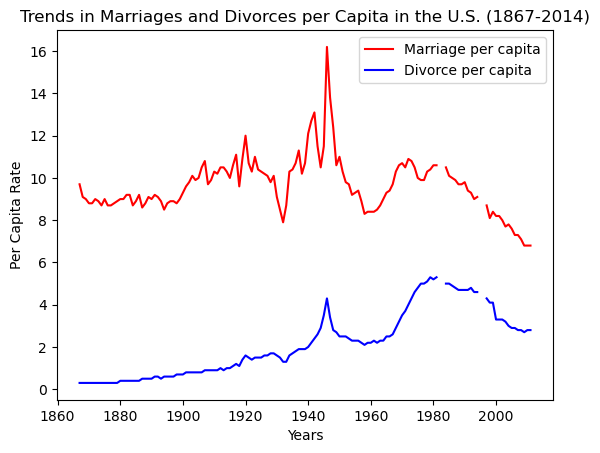

In [126]:
#Question6

#Create a line plot showing the number of marriages and divorces per capita in theU.S. between 1867 and 2014 

import pandas as pd
import matplotlib.pyplot as pp
%matplotlib inline
fig, ax = pp.subplots()

Data= pd.read_csv("C://Users/USER/Downloads/us-marriages-divorces-1867-2014.csv")
Data.head()
ax.plot(Data['Year'],Data['Marriages_per_1000'],label= "Marriage per capita",color='r')
ax.plot(Data['Year'],Data['Divorces_per_1000'],label= "Divorce per capita",color='b')
ax.set_title("Trends in Marriages and Divorces per Capita in the U.S. (1867-2014)")
ax.set_xlabel("Years")
ax.set_ylabel("Per Capita Rate")
ax.legend()


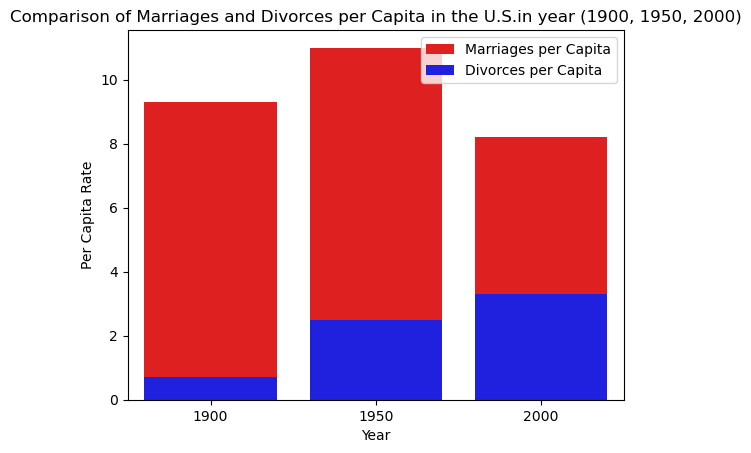

In [130]:
#Question7

#Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
#New_year = ['1900','1950','2000']
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns
%matplotlib inline

data= pd.read_csv("C://Users/USER/Downloads/us-marriages-divorces-1867-2014.csv")
data.head()
filtered = data[data['Year'].isin([1900, 1950, 2000])].reset_index(drop=True)
filtered
sns.barplot(x='Year', y= 'Marriages_per_1000',data=filtered,color='red', label='Marriages per Capita')
sns.barplot(x='Year', y= 'Divorces_per_1000',data=filtered,color='blue', label='Divorces per Capita')
pp.xlabel('Year')
pp.ylabel('Per Capita Rate')
pp.title('Comparison of Marriages and Divorces per Capita in the U.S.in year (1900, 1950, 2000)')
pp.legend()




Text(0.5, 1.0, 'Deadliest Actors in Hollywood by their kills counts ')

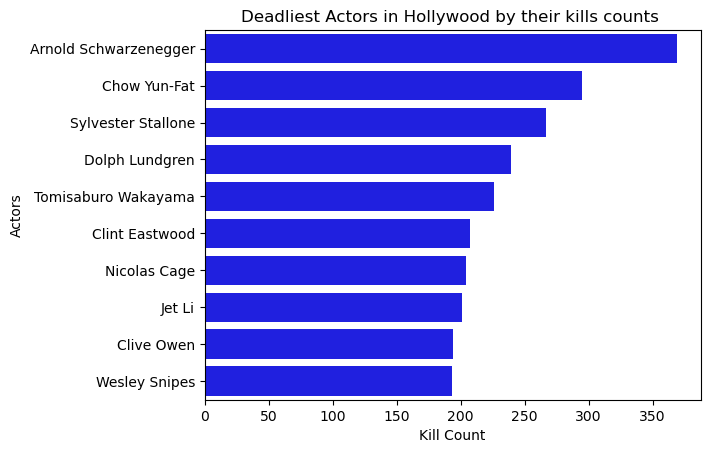

In [140]:
#Question8
#Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns
%matplotlib inline

actor = pd.read_csv("C:/Users/USER/Downloads/actor_kill_counts.csv")
actors = actor.sort_values(by = 'Count', ascending=False)
sns.barplot(x='Count', y= 'Actor',data=actors,color='blue')

pp.xlabel('Kill Count')
pp.ylabel('Actors')
pp.title('Deadliest Actors in Hollywood by their kills counts ')


(-1.0999787381349013,
 1.0999989875302334,
 -1.0999998580849701,
 1.0999999138799157)

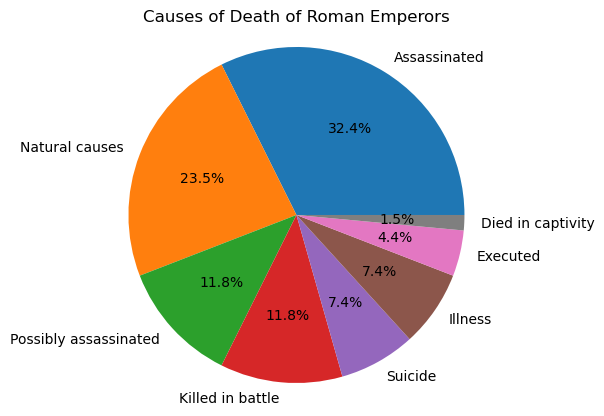

In [11]:
#Question9

#Create a pie chart showing the fraction of all Roman Emperors that were assassinated

import pandas as pd
import matplotlib.pyplot as pp
%matplotlib inline 

roman_data = pd.read_csv("C://Users/USER/Downloads/roman-emperor-reigns.csv")
table =roman_data['Cause_of_Death'].value_counts()
table = pd.DataFrame({'Cause of Death':table.index,'counts':table.values})
pp.pie(table['counts'],labels = table['Cause of Death'],autopct='%1.1f%%')
pp.title('Causes of Death of Roman Emperors')
pp.axis('equal')


Text(0.5, 1.0, 'Relationship between total Arcade Revenue and number of computers between 2000-2009')

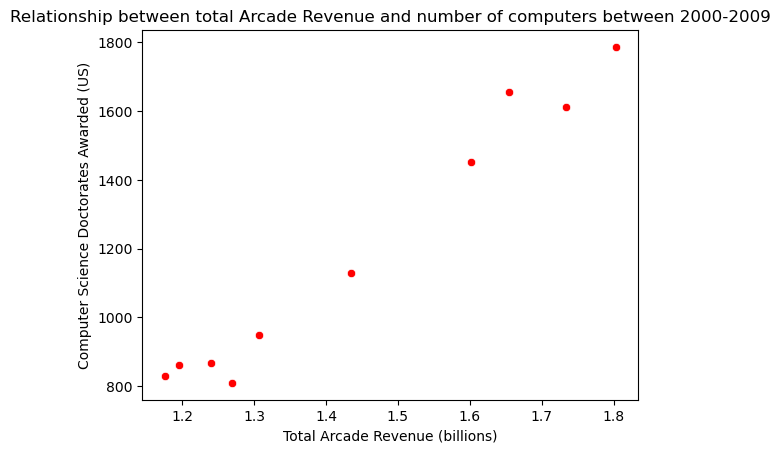

In [21]:
#Question10
#Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 
#2000 and 2009.
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns

data = pd.read_csv("C://Users//USER//Downloads//arcade-revenue-vs-cs-doctorates.csv")
data.head()   

sns.scatterplot(x='Total Arcade Revenue (billions)',y='Computer Science Doctorates Awarded (US)',data=data,color = 'red')
pp.title('Relationship between total Arcade Revenue and number of computers between 2000-2009')
